# Layoffs data analysis 2022

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the data

In [3]:
df = pd.read_csv('layoffs_data.csv')
df

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,JD.ID,Jakarta,Retail,200.0,0.30,2022-12-14,https://jakartaglobe.id/business/jdid-layoffs-...,5100.0,IPO,2022-12-15 02:19:38,Indonesia,Unknown
1,GoStudent,Vienna,Education,100.0,NaN,2022-12-14,https://www.businessinsider.com/gostudent-3-bi...,686.0,Series D,2022-12-15 02:11:42,Austria,Unknown
2,ChowNow,Los Angeles,Food,40.0,0.10,2022-12-14,https://www.restaurantbusinessonline.com/amp/t...,64.0,Series C,2022-12-15 02:10:04,United States,Unknown
3,Landing,Birmingham,Real Estate,NaN,NaN,2022-12-14,https://www.al.com/business/2022/12/birmingham...,347.0,Series C,2022-12-15 02:10:48,United States,Unknown
4,Thumbtack,SF Bay Area,Consumer,160.0,0.14,2022-12-13,Internal memo,698.0,Series I,2022-12-13 20:12:50,United States,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1804,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,Unknown
1805,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,Unknown
1806,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,Unknown
1807,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31 13:21:54,United States,Unknown


# Data Wrangling

In [4]:
df.shape

(1809, 12)

In [5]:
df.columns

Index(['Company', 'Location', 'Industry', 'Laid_Off_Count', 'Percentage',
       'Date', 'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'List_of_Employees_Laid_Off'],
      dtype='object')

In [6]:
df.dtypes

Company                        object
Location                       object
Industry                       object
Laid_Off_Count                float64
Percentage                    float64
Date                           object
Source                         object
Funds_Raised                  float64
Stage                          object
Date_Added                     object
Country                        object
List_of_Employees_Laid_Off     object
dtype: object

In [7]:
df.describe()

,Laid_Off_Count,Percentage,Funds_Raised
count,1270.000000,1221.000000,1675.000000
mean,194.895276,0.273557,853.953012
std,558.610850,0.264559,6258.625679
min,3.000000,0.000000,0.000000
25%,32.000000,0.100000,45.000000
50%,70.000000,0.180000,137.000000
75%,150.000000,0.320000,398.500000
max,11000.000000,1.000000,121900.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     1809 non-null   object 
 1   Location                    1809 non-null   object 
 2   Industry                    1809 non-null   object 
 3   Laid_Off_Count              1270 non-null   float64
 4   Percentage                  1221 non-null   float64
 5   Date                        1808 non-null   object 
 6   Source                      1809 non-null   object 
 7   Funds_Raised                1675 non-null   float64
 8   Stage                       1809 non-null   object 
 9   Date_Added                  1809 non-null   object 
 10  Country                     1809 non-null   object 
 11  List_of_Employees_Laid_Off  1809 non-null   object 
dtypes: float64(3), object(9)
memory usage: 169.7+ KB


In [9]:
df.Industry.unique()

array(['Retail', 'Education', 'Food', 'Real Estate', 'Consumer',
       'Infrastructure', 'Healthcare', 'Sales', 'Product', 'Finance',
       'Transportation', 'Other', 'Crypto', 'HR', 'Marketing', 'Security',
       'Legal', 'Media', 'Unknown', 'Travel', 'Fitness', 'Support',
       'Data', 'Recruiting', 'Energy', 'Logistics', 'Aerospace',
       'Construction'], dtype=object)

In [10]:
df.Country.unique()

array(['Indonesia', 'Austria', 'United States', 'Germany', 'India',
       'Israel', 'Brazil', 'United Kingdom', 'Australia', 'Singapore',
       'Argentina', 'Mexico', 'Nigeria', 'Netherlands', 'Canada',
       'Switzerland', 'Egypt', 'Sweden', 'Ireland', 'Kenya', 'Luxembourg',
       'China', 'Spain', 'Estonia', 'Chile', 'Greece', 'Poland',
       'Seychelles', 'Norway', 'Belgium', 'Denmark', 'Hong Kong',
       'New Zealand', 'Malaysia', 'Hungary', 'Vietnam', 'Thailand',
       'Romania', 'Lithuania', 'Senegal', 'Pakistan',
       'United Arab Emirates', 'Colombia', 'Finland', 'Peru', 'Bahrain',
       'Turkey', 'Russia', 'Uruguay', 'Bulgaria', 'France', 'Portugal',
       'South Africa', 'Czech Republic', 'Myanmar'], dtype=object)

# Data cleaning

In [17]:
df.drop(['Source', 'Funds_Raised', 'Stage', 'Date_Added','List_of_Employees_Laid_Off'], axis=1, inplace=True)

KeyError: "['Source' 'Funds_Raised' 'Stage' 'Date_Added' 'List_of_Employees_Laid_Off'] not found in axis"

In [18]:
df.head()

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Country
0,JD.ID,Jakarta,Retail,200.0,0.30,2022-12-14,Indonesia
1,GoStudent,Vienna,Education,100.0,NaN,2022-12-14,Austria
2,ChowNow,Los Angeles,Food,40.0,0.10,2022-12-14,United States
3,Landing,Birmingham,Real Estate,NaN,NaN,2022-12-14,United States
4,Thumbtack,SF Bay Area,Consumer,160.0,0.14,2022-12-13,United States


In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()
df['year'] = df['Date'].dt.year
df.head()

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Country,month,day,year
0,JD.ID,Jakarta,Retail,200.0,0.30,2022-12-14,Indonesia,12.0,Wednesday,2022.0
1,GoStudent,Vienna,Education,100.0,NaN,2022-12-14,Austria,12.0,Wednesday,2022.0
2,ChowNow,Los Angeles,Food,40.0,0.10,2022-12-14,United States,12.0,Wednesday,2022.0
3,Landing,Birmingham,Real Estate,NaN,NaN,2022-12-14,United States,12.0,Wednesday,2022.0
4,Thumbtack,SF Bay Area,Consumer,160.0,0.14,2022-12-13,United States,12.0,Tuesday,2022.0


# Data visualization

In [20]:
Y = df.groupby('year')['Laid_Off_Count'].sum()
Y

year
2020.0     80968.0
2021.0     15023.0
2022.0    151526.0
Name: Laid_Off_Count, dtype: float64

Text(0, 0.5, 'Count of Layoffs')

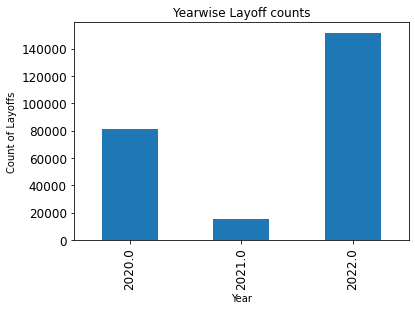

In [21]:
Y.plot(kind='bar',fontsize=12)
plt.title("Yearwise Layoff counts")
plt.xlabel("Year")
plt.ylabel("Count of Layoffs")

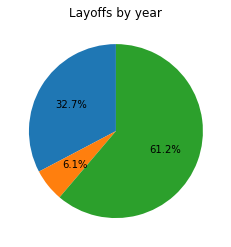

In [29]:
plt.pie(Y, startangle=90, autopct='%1.1f%%')
plt.title("Layoffs by year")
plt.show()

In [32]:
C = df.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending = False)
C

Country
United States           162533.0
India                    31236.0
Brazil                    8110.0
Singapore                 5801.0
Canada                    5199.0
Netherlands               5070.0
United Kingdom            4870.0
China                     4430.0
Germany                   4283.0
Indonesia                 3161.0
Israel                    2938.0
Sweden                    2014.0
Australia                 1215.0
United Arab Emirates       995.0
Hong Kong                  730.0
Austria                    570.0
Nigeria                    491.0
Russia                     400.0
Kenya                      349.0
Argentina                  323.0
Senegal                    300.0
Mexico                     270.0
Estonia                    267.0
Finland                    250.0
Denmark                    240.0
Ireland                    230.0
Myanmar                    200.0
Norway                     140.0
Romania                    140.0
Bulgaria                   120.0
Po

Text(0, 0.5, 'Count of Layoffs')

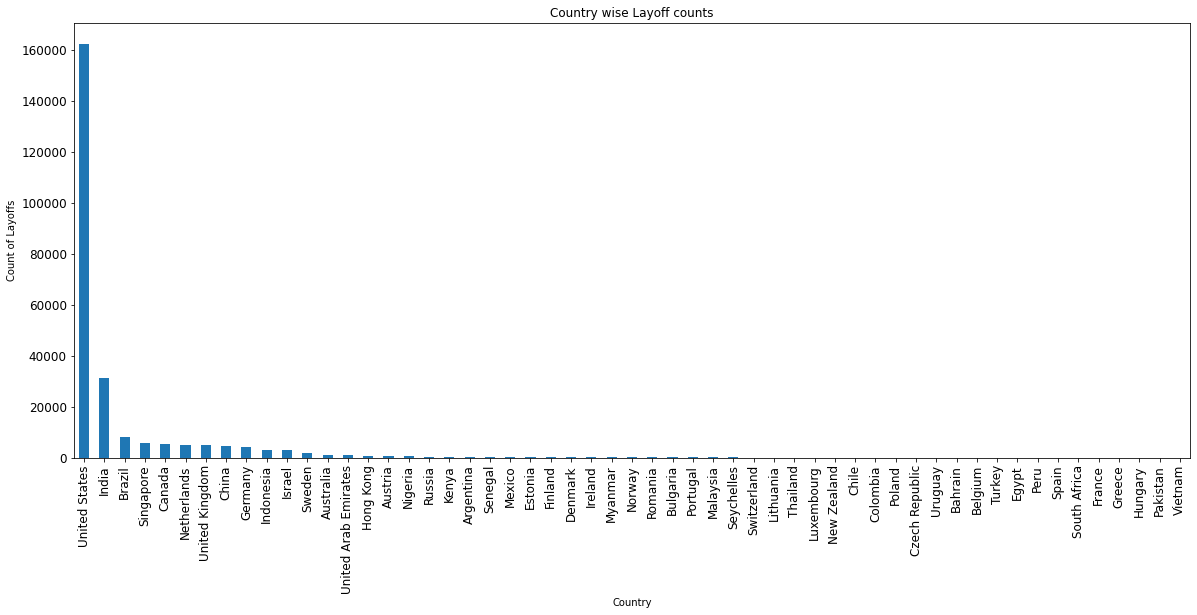

In [34]:
C.plot(kind='bar',fontsize=12, figsize=(20,8))
plt.title("Country wise Layoff counts")
plt.xlabel("Country")
plt.ylabel("Count of Layoffs")

Text(0, 0.5, 'Count of Layoffs')

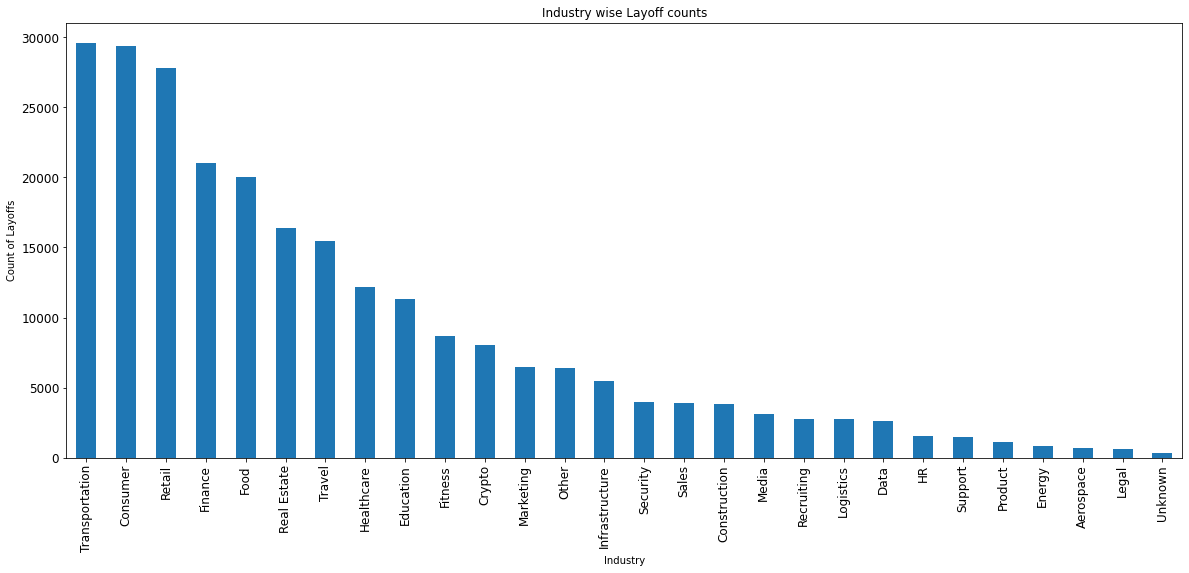

In [38]:
I = df.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending = False)
I.plot(kind ='bar',fontsize=12, figsize=(20,8))
plt.title("Industry wise Layoff counts")
plt.xlabel("Industry")
plt.ylabel("Count of Layoffs")

In [35]:
df.groupby('Industry')['Percentage'].mean().sort_values(ascending=False).round(3)

Industry
Aerospace         0.565
Travel            0.368
Education         0.353
Food              0.343
Fitness           0.330
Recruiting        0.323
Real Estate       0.319
Infrastructure    0.306
Legal             0.305
Retail            0.302
Crypto            0.297
Consumer          0.286
Product           0.285
Healthcare        0.280
Construction      0.273
HR                0.270
Support           0.265
Media             0.253
Other             0.252
Finance           0.249
Transportation    0.228
Energy            0.225
Unknown           0.222
Data              0.215
Marketing         0.209
Logistics         0.200
Security          0.176
Sales             0.106
Name: Percentage, dtype: float64

In [36]:
df20 = df.query('year==2020')
df1 = df20.groupby('month')['Laid_Off_Count'].sum()
df1

month
3.0      9628.0
4.0     26710.0
5.0     25804.0
6.0      7627.0
7.0      7112.0
8.0      1969.0
9.0       609.0
10.0      450.0
11.0      207.0
12.0      852.0
Name: Laid_Off_Count, dtype: float64

In [37]:
df21 = df.query('year==2021')
df2 = df21.groupby('month')['Laid_Off_Count'].sum()
df2

month
1.0     6013.0
2.0      868.0
3.0       47.0
4.0      261.0
5.0        0.0
6.0     2434.0
7.0       80.0
8.0     1867.0
9.0      161.0
10.0      22.0
11.0    2070.0
12.0    1200.0
Name: Laid_Off_Count, dtype: float64

In [38]:
df22 = df.query('year==2022')
df3 = df22.groupby('month')['Laid_Off_Count'].sum()
df3

month
1.0       510.0
2.0      3625.0
3.0      5694.0
4.0      4064.0
5.0     12535.0
6.0     17584.0
7.0     16223.0
8.0     13095.0
9.0      5881.0
10.0    12856.0
11.0    51489.0
12.0     7970.0
Name: Laid_Off_Count, dtype: float64

In [39]:
combined = pd.concat([df1,df2,df3], axis = 1)
combined

,Laid_Off_Count,Laid_Off_Count,Laid_Off_Count
month,,,
1.0,NaN,6013.0,510.0
2.0,NaN,868.0,3625.0
3.0,9628.0,47.0,5694.0
4.0,26710.0,261.0,4064.0
5.0,25804.0,0.0,12535.0
6.0,7627.0,2434.0,17584.0
7.0,7112.0,80.0,16223.0
8.0,1969.0,1867.0,13095.0
9.0,609.0,161.0,5881.0


Text(0, 0.5, 'Layoff counts')

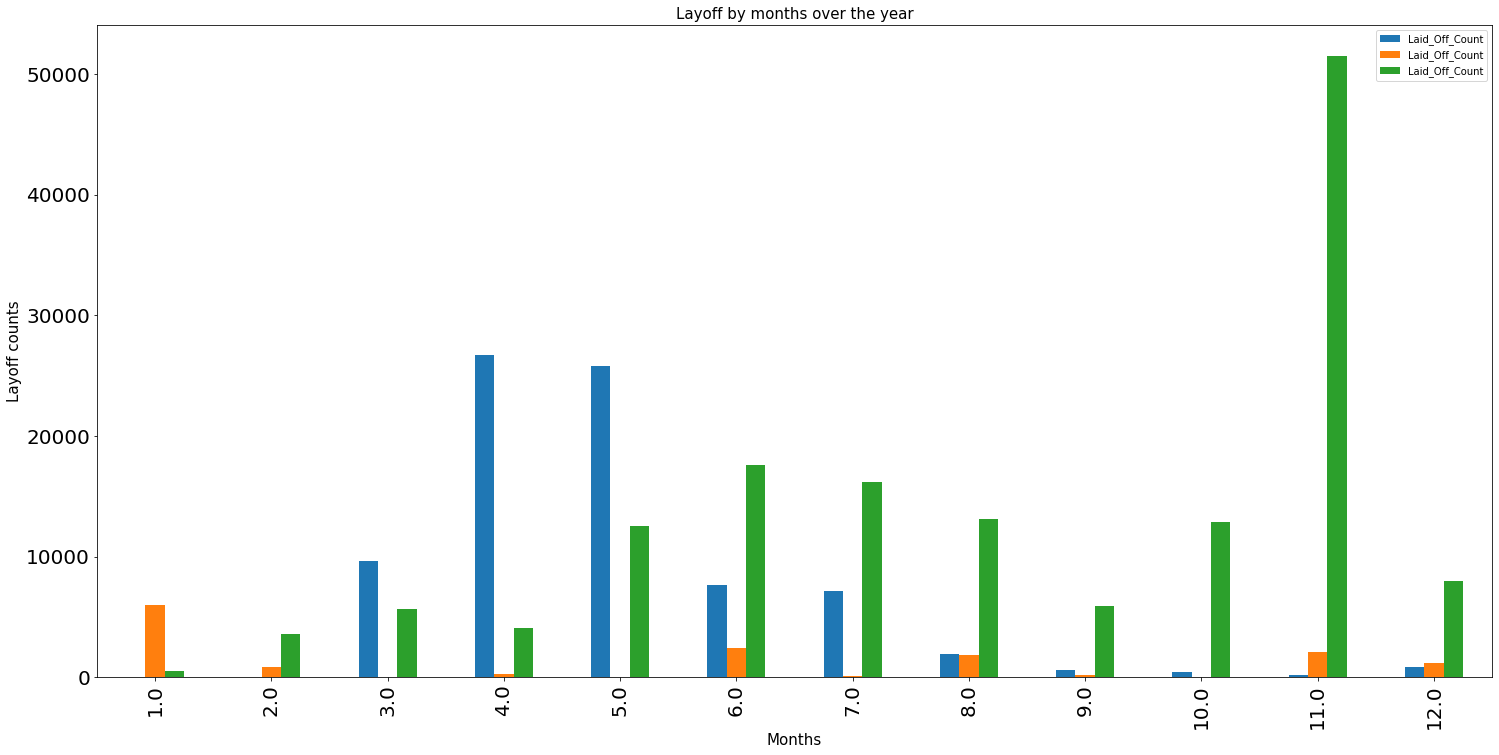

In [45]:
combined.plot(kind = 'bar', figsize = (25,12), fontsize = 20)
plt.title("Layoff by months over the year", fontsize = 15)
plt.xlabel('Months', fontsize = 15)
plt.ylabel("Layoff counts", fontsize = 15)